# **SPRINT 02**

## PARTE A - Transformación de Datos:

__Objetivos:__ en la Parte A debes implementar al menos tres de las transformaciones de datos propuestas.

La consigna del __SPRINT 02__ requiere la ejecución de algunas tareas de transformación de datos como las listadas a continuación:

  - [x] Detección y eliminación de Outliers
  - [x] Encoding
  - [x] Imputación de valores faltantes
  - [X] Escalado de datos
  - [ ] Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

### Transformaciones de datos realizadas al dataset durante el SPRINT 01:

Durante el desarrollo del SPRINT 01 le fueron aplicados filtros al set de datos según lo requerido en la consigna del SPRINT 01. El set de datos fue delimitado a:

  1. Propiedades ubicadas en: Capital Federal.
  2. Tipo de propiedad: Departamento, Casa y PH.
  3. Superficie total: mayores a 15 y hasta 1000 metros cuadrados.
  4. Precio: menor a 4.000.000 de dólares.
  5. Variables a usar en el modelo: `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`

Para el SPRINT 02 se realizará la misma delimitación que en los items 1,2,3 y 4 de la lista anterior, con la diferencia que se añadirá la columna property_type (tipo de propiedad) al set de datos, con la intención de usarla como variable independiente categórica.

### Metodología:

Se plantea realizar el filtrado o delimitación del dataset arriba descrito para entonces realizar las transformaciones establecidas en el SPRINT 02.

  - Detección y tratamiento de valores faltantes: los valores faltantes detectados fueron eliminados directamente.
  - Detección y eliminación de outliers: los valores atípicos 

In [48]:
# CARGANDO SET DE DATOS USANDO PANDAS

datos_proper_SPR02 = pd.read_csv ("DS_Proyecto_01_Datos_Properati.csv")
print("El set de datos fue cargado satisfactoriamente.")

El set de datos fue cargado satisfactoriamente.
time: 2.09 s (started: 2021-06-14 23:07:34 -03:00)


### Filtrado del set de datos segun la consigna SPRINT 01:

In [49]:
#Filtrado 0: Selecciona aquellas propiedades en Capital Federal.
datos_proper_SPR02_f0 = datos_proper_SPR02[datos_proper_SPR02["l2"]== "Capital Federal"]
datos_proper_SPR02_f0.shape

(92539, 19)

time: 31 ms (started: 2021-06-14 23:07:36 -03:00)


In [50]:
# Filtrado 1: por los 3 tipos de propiedad más abundantes: "Departamento", "Casa" y "PH"
datos_proper_SPR02_f1 = datos_proper_SPR02_f0[(datos_proper_SPR02_f0["property_type"] == "Departamento") | (datos_proper_SPR02_f0["property_type"] == "Casa") | (datos_proper_SPR02_f0["property_type"] == "PH")]
datos_proper_SPR02_f1.shape

(91485, 19)

time: 47 ms (started: 2021-06-14 23:07:36 -03:00)


In [51]:
#Filtrado 2: Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
datos_proper_SPR02_f2= datos_proper_SPR02_f1[(datos_proper_SPR02_f1["surface_total"] < 1000) & (datos_proper_SPR02_f1["surface_total"] > 15)]
datos_proper_SPR02_f2.shape

(82392, 19)

time: 31 ms (started: 2021-06-14 23:07:36 -03:00)


In [52]:
#Filtrado 3: Selecciona aquellas propiedades cuya precio es menor 4.000.000 dólares.
datos_proper_SPR02_f3= datos_proper_SPR02_f2[(datos_proper_SPR02_f2["price"] < 4000000)]
datos_proper_SPR02_f3.shape

(82347, 19)

time: 31 ms (started: 2021-06-14 23:07:36 -03:00)


In [53]:
#Filtrado 4: Seleccionamos las columnas 'l3',`rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, 'property_type' y `price`, 'title',
datos_proper_SPR02_f4= datos_proper_SPR02_f3.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 
       'currency', 'description', 
       'operation_type'], axis=1)

datos_proper_SPR02_f4.head() #Verificamos que preservemos las columnas deseadas en el dataset

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,PH


time: 15 ms (started: 2021-06-14 23:07:36 -03:00)


In [54]:
datos_proper_SPR02_f4.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,82347.000000,82347.000000,81467.000000,82347.000000,81830.000000,8.234700e+04
mean,3.006497,2.000146,1.552886,95.162192,84.775877,2.622480e+05
std,1.307623,1.050772,0.850979,76.934055,155.399937,2.939044e+05
min,1.000000,0.000000,1.000000,16.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.798000e+05
75%,4.000000,3.000000,2.000000,110.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,995.000000,17220.000000,3.900000e+06


time: 47 ms (started: 2021-06-14 23:07:36 -03:00)


## i.- Detección e imputación de valores faltantes:

In [55]:
#
datos_proper_SPR02_f4.isnull().sum()

l3                   0
rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
title                0
property_type        0
dtype: int64

time: 15 ms (started: 2021-06-14 23:07:36 -03:00)


In [56]:
# Verificamos el % de datos faltantes por columna
datos_proper_SPR02_f4.isnull().sum().sort_values(ascending=False)/len(datos_proper_SPR02_f4)*100

bathrooms          1.068649
surface_covered    0.627831
property_type      0.000000
title              0.000000
price              0.000000
surface_total      0.000000
bedrooms           0.000000
rooms              0.000000
l3                 0.000000
dtype: float64

time: 16 ms (started: 2021-06-14 23:07:36 -03:00)


In [57]:
# 
datos_proper_SPR02_f4_IMP= datos_proper_SPR02_f4.copy()
datos_proper_SPR02_f4_IMP['bathrooms'].fillna(datos_proper_SPR02_f4_IMP['bathrooms'].mode()[0], inplace = True)
datos_proper_SPR02_f4_IMP['surface_covered'].fillna(datos_proper_SPR02_f4_IMP['surface_covered'].mode()[0], inplace = True)
datos_proper_SPR02_f4_IMP.isnull().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
title              0
property_type      0
dtype: int64

time: 16 ms (started: 2021-06-14 23:07:36 -03:00)


In [58]:
# 
print("Media de bathrooms PRE imputación", ("{:.3f}".format(datos_proper_SPR02_f4["bathrooms"].mean())))
print("Media de bathrooms POST imputación", ("{:.3f}".format(datos_proper_SPR02_f4_IMP["bathrooms"].mean())))

Media de bathrooms PRE imputación 1.553
Media de bathrooms POST imputación 1.547
time: 0 ns (started: 2021-06-14 23:07:36 -03:00)


In [59]:
# 
print("Media de bathrooms PRE imputación", ("{:.3f}".format(datos_proper_SPR02_f4["surface_covered"].mean())))
print("Media de bathrooms POST imputación", ("{:.3f}".format(datos_proper_SPR02_f4_IMP["surface_covered"].mean())))

Media de bathrooms PRE imputación 84.776
Media de bathrooms POST imputación 84.495
time: 0 ns (started: 2021-06-14 23:07:36 -03:00)


### i.1.- Análisis del proceso de imputación de valores faltantes

In [60]:
print("Tamaño del set de datos resultante", datos_proper_SPR02_f4_IMP.shape)

Tamaño del set de datos resultante (82347, 9)
time: 0 ns (started: 2021-06-14 23:07:36 -03:00)


## j.- Detección y eliminación de Outliers: Detección

In [61]:
# Verificamos la proporción de cantidades de tipos de propiedad en el dataset filtrado
datos_proper_SPR02_f4_IMP["property_type"].value_counts()

Departamento    70409
PH               9703
Casa             2235
Name: property_type, dtype: int64

time: 15 ms (started: 2021-06-14 23:07:36 -03:00)


In [62]:
datos_proper_SPR02_f4_IMP["l3"].value_counts()

Palermo                 12378
Almagro                  6854
Belgrano                 6061
Villa Crespo             6000
Caballito                5784
Recoleta                 5539
Barrio Norte             3131
Villa Urquiza            2977
Balvanera                2438
Flores                   2170
Nuñez                    1848
Puerto Madero            1727
Colegiales               1314
Villa Devoto             1280
Parque Centenario        1274
Villa del Parque         1255
Paternal                  982
San Cristobal             963
Saavedra                  962
San Telmo                 957
Floresta                  844
Retiro                    782
Boedo                     758
Once                      750
Monserrat                 748
San Nicolás               724
Parque Chacabuco          713
Las Cañitas               700
Barracas                  690
Liniers                   678
Villa Pueyrredón          674
Chacarita                 654
Congreso                  616
Monte Cast

time: 16 ms (started: 2021-06-14 23:07:37 -03:00)


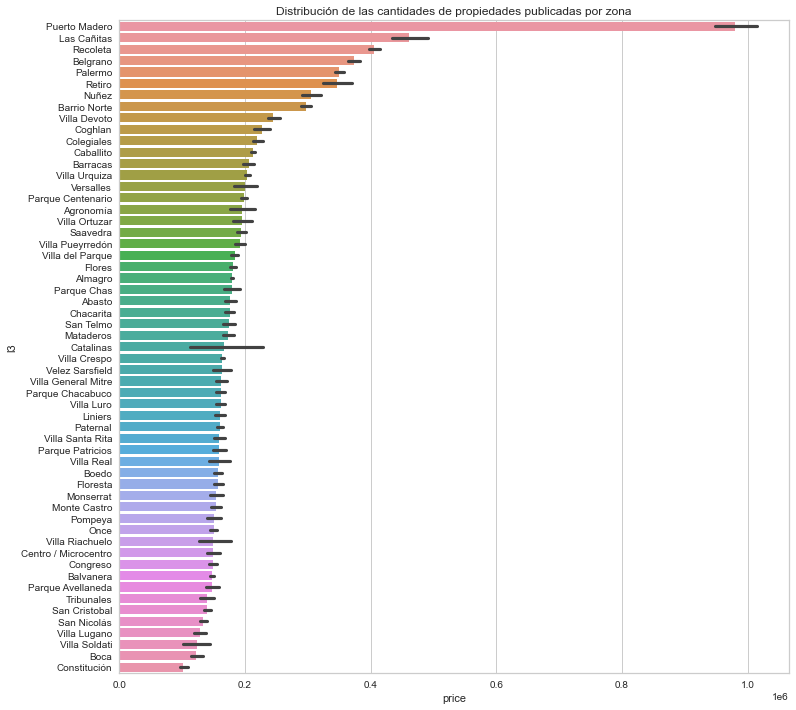

time: 3.47 s (started: 2021-06-14 23:07:37 -03:00)


In [63]:
# Consultamos la distribución de los precios de las propiedades según la zona donde se encuentran

plt.figure(figsize=(12,12))
order1 = datos_proper_SPR02_f4_IMP.groupby(['l3']).mean().sort_values('price', ascending = False).index.values
plt.title('Distribución de las cantidades de propiedades publicadas por zona')
sns.barplot(y=datos_proper_SPR02_f4_IMP['l3'], x= datos_proper_SPR02_f4_IMP['price'] , order=order1, log=False)
plt.show()

__Gráfica 17.__ Desplegamos gráficamente la distribución de las propiedades según el barrio (variable l3) donde éstas se encuentran ubicadas.

<AxesSubplot:xlabel='property_type', ylabel='price'>

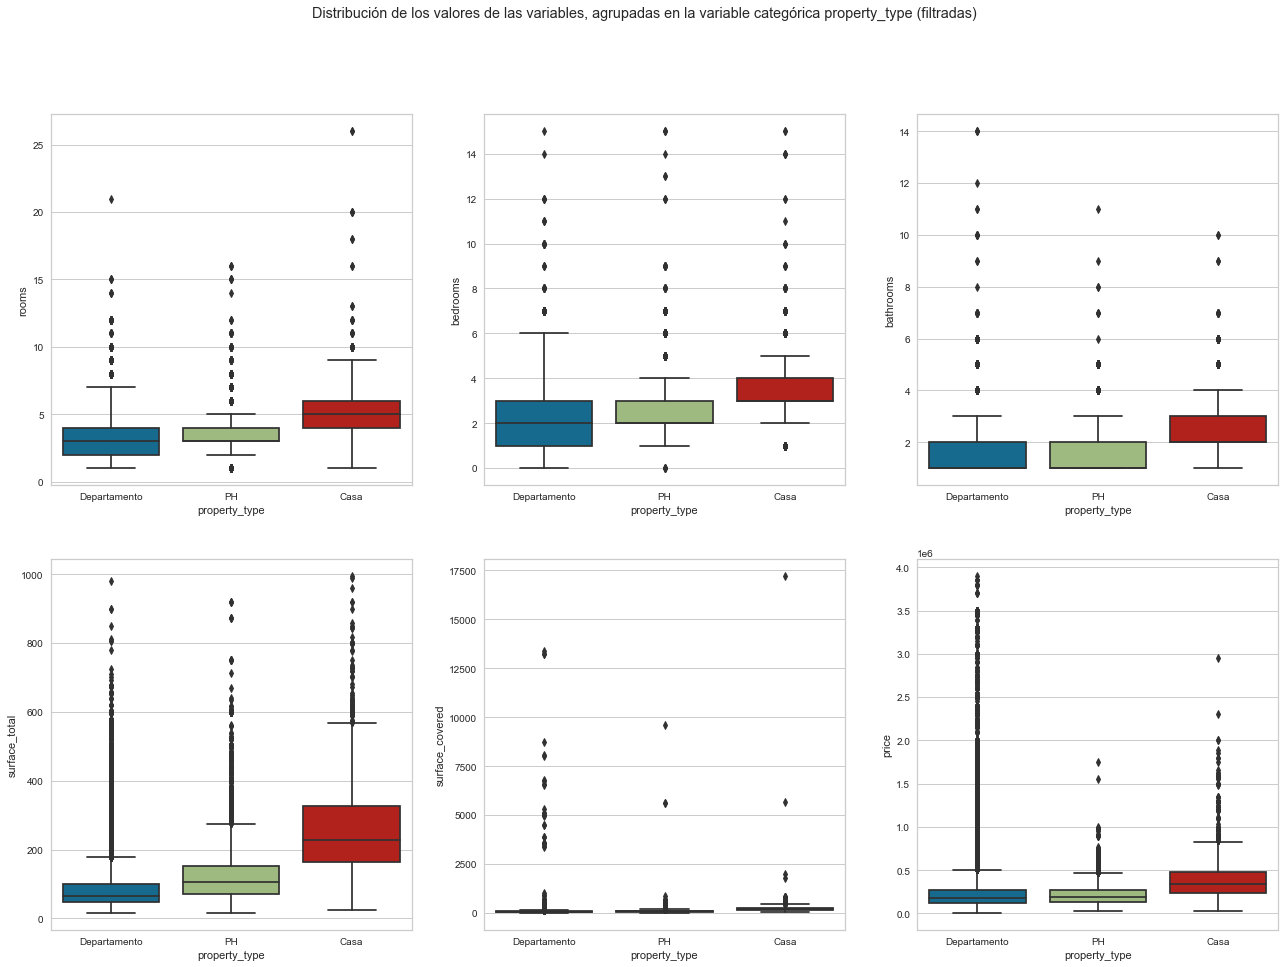

time: 1.08 s (started: 2021-06-14 23:07:40 -03:00)


In [64]:
# Vizualizando la distribucion de los valores de la variable categórica: tipos de propiedad
fig, axes = plt.subplots(2, 3, figsize=(22, 15))

fig.suptitle('Distribución de los valores de las variables, agrupadas en la variable categórica property_type (filtradas)')

sns.boxplot(ax=axes[0, 0], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='rooms')
sns.boxplot(ax=axes[0, 1], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='bedrooms')
sns.boxplot(ax=axes[0, 2], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='bathrooms', )
sns.boxplot(ax=axes[1, 0], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='surface_total')
sns.boxplot(ax=axes[1, 1], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='surface_covered')
sns.boxplot(ax=axes[1, 2], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='price')

__Gráfica 18.__ Este análisis en búsqueda de los valores atípicos en el set de datos, es el mismo realizado en el SPRINT 01.

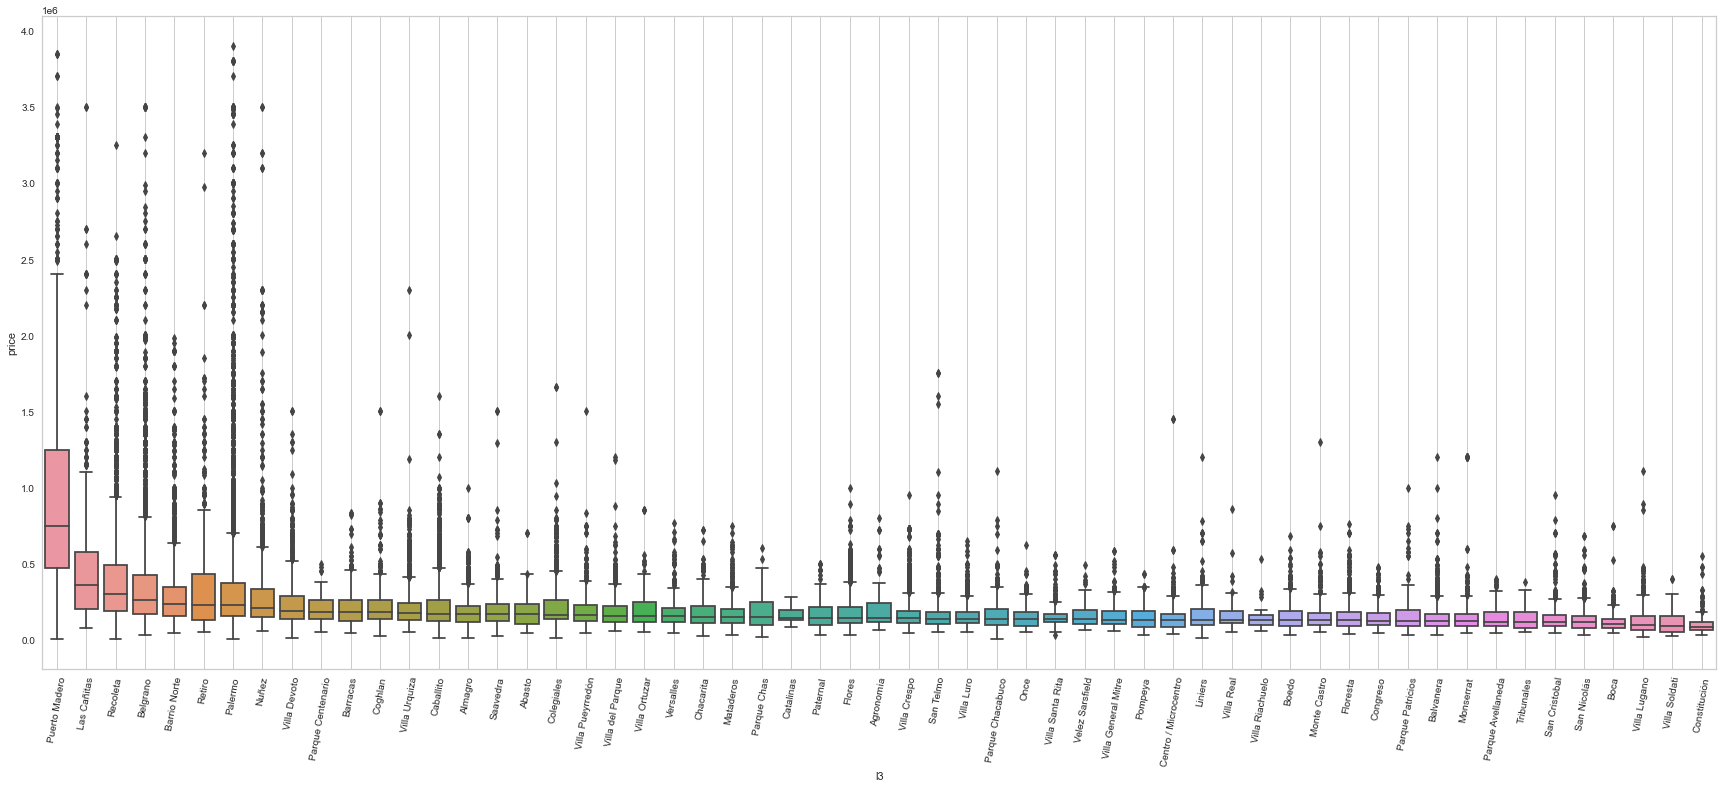

time: 2.23 s (started: 2021-06-14 23:07:41 -03:00)


In [65]:
# Visualizando la distribucion de los valores de la variable categórica: tipos de propiedad
plt.figure(figsize=(30,12))
fig.suptitle('Distribución de el precio de las propiedades (filtradas)')

grouped = datos_proper_SPR02_f4_IMP.loc[:,['l3', 'price']] \
    .groupby(['l3']) \
    .median() \
    .sort_values(by='price', ascending= False)

ax= sns.boxplot( data= datos_proper_SPR02_f4_IMP, x='l3' , y='price', order=grouped.index)
#ax.set_yscale('log')
#plt.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.setp(ax.get_xticklabels(), rotation=80)
plt.grid()
plt.show()

__Gráfica 19.__ Al agrupar las propiedades segun la columna l3 (ordenados por la mediana en descendiente) y analizar su distribución de atípicos, se revela claramente que se requieren varios tratamientos de atípicos segun esta variable l3 que se refiere a los barrios donde se ubican las propiedades. 

Los barrios de la siguiente lista:

*  Puerto Madero
*  Las Cañitas
*  Recoleta
*  Belgrano
*  Barrio Norte
*  Palermo
*  Nuñez

Muestran una alta densidad de valores por arriba del extremo del bigote superior, esto indica que existen muchas propiedades con precios muy por encima del grupo estadístico tipico para cada barrio. Se realizará un drill down en el tipo de propiedades para conocer la distribucion de precios con ese nivel de granularidad y entender mejor el fenómeno de outliers.
___

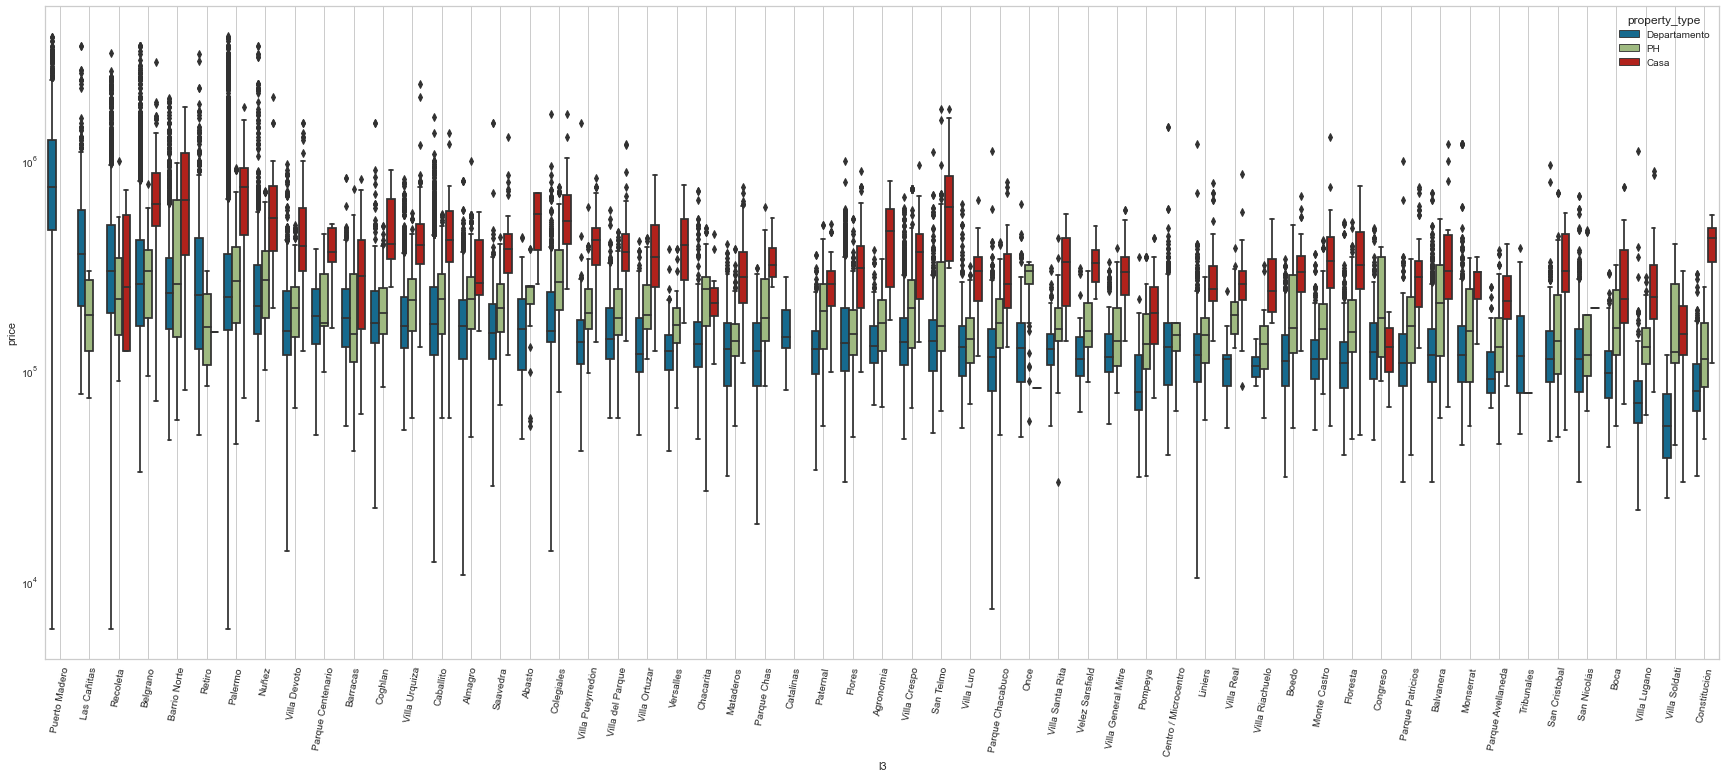

time: 4.75 s (started: 2021-06-14 23:07:43 -03:00)


In [66]:
# Visualizando la distribucion de los valores de la variable categórica: tipos de propiedad
plt.figure(figsize=(30,12))
fig.suptitle('Distribución del precio de las propiedades, agrupadas en la variable categórica property_type (filtradas)')

grouped = datos_proper_SPR02_f4_IMP.loc[:,['l3', 'price']] \
    .groupby(['l3']) \
    .median() \
    .sort_values(by='price', ascending= False)

ax= sns.boxplot( data= datos_proper_SPR02_f4_IMP, x='l3' , y='price', hue="property_type", order=grouped.index)
ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), rotation=80)
plt.grid()
plt.show()


__Gráfica 20.__ Al hacer un "drill down" al mismo gráfico de cajas anterior, logramos "discriminar" con colores los tipos de propiedades en cada barrio, pudiendo revelar una interesante diferencia en la mediana de los precios de las casas (color rojo) en comparación con los otros dos tipos de propiedades (departamento y PH). Esta diferencia que se mantiene lateralmente, le confiere a la variable "property_type" una importante capacidad predictora del precio, ya que su condición de variable categórica ayudaría ha hacer una previa separación del tipo de propiedad casas, lo que es favorable al algoritmo. Esta observación se tomará en cuenta durante el modelado.

In [67]:
# Verificamos el tipo de propiedad más publicada por barrio (propiedades más publicadas por barrio)
datos_proper_SPR02_f4_IMP.groupby('l3').apply(lambda subf: subf['property_type'][subf['surface_covered'].idxmax()])

l3
Abasto                          Casa
Agronomía                       Casa
Almagro                         Casa
Balvanera                       Casa
Barracas                        Casa
Barrio Norte            Departamento
Belgrano                Departamento
Boca                            Casa
Boedo                             PH
Caballito               Departamento
Catalinas               Departamento
Centro / Microcentro    Departamento
Chacarita                       Casa
Coghlan                         Casa
Colegiales              Departamento
Congreso                Departamento
Constitución                    Casa
Flores                  Departamento
Floresta                Departamento
Las Cañitas             Departamento
Liniers                 Departamento
Mataderos                       Casa
Monserrat                       Casa
Monte Castro            Departamento
Nuñez                           Casa
Once                    Departamento
Palermo                 Departament

time: 32 ms (started: 2021-06-14 23:07:48 -03:00)


### j.1.- Análisis y comprensión de outliers:

In [68]:
# Analisis de outliers de la columna rooms
df_rooms_outliers= datos_proper_SPR02_f4_IMP.loc[lambda df: df['rooms'] > 15, :]
df_rooms_outliers.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,19.214286,11.928571,4.642857,434.785714,445.071429,522357.142857
std,3.423416,4.178043,1.736803,216.776091,209.943752,197451.301549
min,16.000000,1.000000,1.000000,53.000000,45.000000,135000.000000
25%,16.000000,9.250000,4.000000,295.000000,297.000000,460000.000000
50%,19.000000,14.000000,4.000000,443.000000,466.000000,500000.000000
75%,20.000000,15.000000,6.000000,476.000000,467.000000,699500.000000
max,26.000000,15.000000,7.000000,845.000000,835.000000,760000.000000


time: 16 ms (started: 2021-06-14 23:07:48 -03:00)


In [69]:
#  Analisis de outliers de la columna bedrooms
df_bedrooms_outliers= datos_proper_SPR02_f4_IMP.loc[lambda df: df['bedrooms'] > 6, :]
df_bedrooms_outliers

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",Departamento
584,Palermo,8.0,7.0,5.0,240.0,240.0,575000.0,Depto.tipo casa de 8 ambientes en Venta en Pal...,PH
1587,Barrio Norte,8.0,7.0,5.0,601.0,400.0,650000.0,Depto.tipo casa de 8 ambientes en Venta en Bar...,PH
2938,Once,8.0,7.0,1.0,180.0,180.0,299000.0,Depto.tipo casa de 8 ambientes en Venta en Once,PH
2939,Barrio Norte,8.0,7.0,5.0,601.0,400.0,650000.0,Depto.tipo casa de 8 ambientes en Venta en Bar...,PH
...,...,...,...,...,...,...,...,...,...
141986,Villa Riachuelo,11.0,8.0,4.0,463.0,463.0,300000.0,Fructuoso Rivera 6200 V Riachuelo PH en block ...,PH
142040,Floresta,12.0,9.0,4.0,310.0,225.0,300000.0,Yerbal 3600 Floresta PH 12amb PB u$ 300.000,PH
142101,Villa Urquiza,8.0,7.0,3.0,451.0,249.0,530000.0,ESPECTACULAR PH EN VILLA URQUIZA VENTA OPORTUN...,PH
142106,San Telmo,15.0,12.0,7.0,540.0,250.0,690000.0,OPORTUNIDAD!!! VENTA EN BLOCK DE 2 PH EN SAN T...,PH


time: 16 ms (started: 2021-06-14 23:07:48 -03:00)


In [70]:
df_bedrooms_outliers.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,263.000000,263.000000,263.000000,263.000000,263.000000,2.630000e+02
mean,9.262357,8.022814,3.467681,315.334601,269.942966,4.521414e+05
std,3.025904,1.935864,2.063381,186.391308,147.405580,2.908578e+05
min,2.000000,7.000000,1.000000,47.000000,40.000000,1.000000e+05
25%,8.000000,7.000000,1.000000,180.000000,170.000000,2.525000e+05
50%,8.000000,7.000000,3.000000,240.000000,240.000000,3.950000e+05
75%,10.000000,8.000000,5.000000,405.000000,372.500000,5.750000e+05
max,26.000000,15.000000,10.000000,919.000000,835.000000,2.299000e+06


time: 15 ms (started: 2021-06-14 23:07:48 -03:00)


In [71]:
#  Analisis de outliers de la columna bathrooms
df_bathrooms_outliers= datos_proper_SPR02_f4_IMP.loc[lambda df: df['bathrooms'] > 4, :]
df_bathrooms_outliers

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
310,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,Venta espectacular 4 ambientes en torre Alvear...,Departamento
325,Palermo,5.0,4.0,5.0,266.0,266.0,2200000.0,Torre Bellini - Palermo Chico - 4 amb con dep ...,Departamento
327,Palermo,5.0,4.0,5.0,266.0,266.0,2200000.0,5 amb con dep - 2 cocheras y baulera - Torre B...,Departamento
584,Palermo,8.0,7.0,5.0,240.0,240.0,575000.0,Depto.tipo casa de 8 ambientes en Venta en Pal...,PH
1109,Villa Devoto,6.0,3.0,5.0,720.0,460.0,1500000.0,Casa venta Devoto 6 amb. Jardín y 3 cocheras,Casa
...,...,...,...,...,...,...,...,...,...
146143,Palermo,8.0,3.0,6.0,301.0,239.0,900000.0,Excelente oportunidad de reciclaje en Barrio P...,Departamento
146145,Palermo,8.0,3.0,5.0,301.0,239.0,1290000.0,"Excelente Departamento de 301 m² con Terraza, ...",Departamento
146181,Palermo,4.0,3.0,5.0,220.0,210.0,1470000.0,TORRE DECO SEGUI ESPECTACULAR UNIDAD DE 4 AMB ...,Departamento
146532,Palermo,6.0,4.0,6.0,326.0,326.0,2740000.0,Torre Mirabilia Piso de 326 m2 - 4 Suites - 4 ...,Departamento


time: 16 ms (started: 2021-06-14 23:07:48 -03:00)


In [72]:
#  Analisis de outliers de la columna bathrooms
df_price_outliers= datos_proper_SPR02_f4_IMP.loc[lambda df: df['price'] > 2490000, :]
df_price_outliers

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
310,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,Venta espectacular 4 ambientes en torre Alvear...,Departamento
1000,Palermo,4.0,3.0,3.0,387.0,270.0,2690000.0,Espectacular Piso en Venta en Palermo Chico c...,Departamento
1535,Palermo,4.0,3.0,3.0,220.0,220.0,3000000.0,Departamento en Venta ubicado en Palermo Chico...,Departamento
2773,Palermo,4.0,3.0,3.0,250.0,250.0,3500000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
2862,Puerto Madero,4.0,3.0,5.0,576.0,438.0,3300000.0,U$S 3.300.000 - 4 amb en Duplex 576 mts2 - Ma...,Departamento
...,...,...,...,...,...,...,...,...,...
146137,Palermo,5.0,3.0,3.0,535.0,220.0,2800000.0,VENTA con RENTA hasta Feb 2020 TORRES DE GELL...,Departamento
146150,Palermo,4.0,3.0,3.0,250.0,250.0,3450000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
146152,Palermo,4.0,3.0,3.0,250.0,250.0,3500000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
146154,Palermo,4.0,3.0,3.0,250.0,250.0,3450000.0,Venta - Figueroa Alcorta Pte. Av. 3500,Departamento


time: 16 ms (started: 2021-06-14 23:07:48 -03:00)


In [73]:
df_price_outliers.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,275.000000,275.000000,275.000000,275.000000,275.000000,2.750000e+02
mean,5.134545,3.560000,4.214545,417.196364,358.661818,3.019465e+06
std,1.340037,0.638657,1.175079,119.179179,89.041726,3.922082e+05
min,2.000000,1.000000,1.000000,54.000000,54.000000,2.499000e+06
25%,4.000000,3.000000,3.000000,334.000000,300.000000,2.600000e+06
50%,5.000000,4.000000,4.000000,406.000000,335.000000,3.000000e+06
75%,6.000000,4.000000,5.000000,540.000000,438.000000,3.300000e+06
max,9.000000,5.000000,8.000000,726.000000,700.000000,3.900000e+06


time: 47 ms (started: 2021-06-14 23:07:48 -03:00)


In [74]:
test=df_price_outliers[df_price_outliers['l3']== ("Palermo" and "Puerto Madero")]
test

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
310,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,Venta espectacular 4 ambientes en torre Alvear...,Departamento
2862,Puerto Madero,4.0,3.0,5.0,576.0,438.0,3300000.0,U$S 3.300.000 - 4 amb en Duplex 576 mts2 - Ma...,Departamento
2864,Puerto Madero,4.0,3.0,5.0,576.0,438.0,3300000.0,U$S 3.300.000 - 4 amb en Duplex 576 mts2 - Ma...,Departamento
2865,Puerto Madero,4.0,3.0,3.0,335.0,335.0,3100000.0,VENTA TORRE RENOIR II Máxima categoría Increib...,Departamento
11913,Puerto Madero,5.0,4.0,4.0,576.0,438.0,3300000.0,VENTA Madero Center VISTA DIQUE DUPLEX ALTO!!!...,Departamento
...,...,...,...,...,...,...,...,...,...
141761,Puerto Madero,5.0,4.0,6.0,426.0,426.0,2600000.0,Departamento con la mejor vista de Puerto Made...,Departamento
141842,Puerto Madero,5.0,4.0,4.0,540.0,438.0,3300000.0,MADERO CENTER EDIFICIO DIQUE DUPLEX 5 AMBIENTE...,Departamento
141843,Puerto Madero,5.0,4.0,4.0,576.0,438.0,3300000.0,VENTA Madero Center VISTA DIQUE DUPLEX ALTO!!!...,Departamento
141844,Puerto Madero,5.0,4.0,6.0,568.0,438.0,3200000.0,Madero Center La Mejor Manzana de Puerto Madero,Departamento


time: 31 ms (started: 2021-06-14 23:07:48 -03:00)


In [75]:
df_price_outliers

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
310,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,Venta espectacular 4 ambientes en torre Alvear...,Departamento
1000,Palermo,4.0,3.0,3.0,387.0,270.0,2690000.0,Espectacular Piso en Venta en Palermo Chico c...,Departamento
1535,Palermo,4.0,3.0,3.0,220.0,220.0,3000000.0,Departamento en Venta ubicado en Palermo Chico...,Departamento
2773,Palermo,4.0,3.0,3.0,250.0,250.0,3500000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
2862,Puerto Madero,4.0,3.0,5.0,576.0,438.0,3300000.0,U$S 3.300.000 - 4 amb en Duplex 576 mts2 - Ma...,Departamento
...,...,...,...,...,...,...,...,...,...
146137,Palermo,5.0,3.0,3.0,535.0,220.0,2800000.0,VENTA con RENTA hasta Feb 2020 TORRES DE GELL...,Departamento
146150,Palermo,4.0,3.0,3.0,250.0,250.0,3450000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
146152,Palermo,4.0,3.0,3.0,250.0,250.0,3500000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
146154,Palermo,4.0,3.0,3.0,250.0,250.0,3450000.0,Venta - Figueroa Alcorta Pte. Av. 3500,Departamento


time: 16 ms (started: 2021-06-14 23:07:48 -03:00)


Text(0, 0.5, 'Frecuecia')

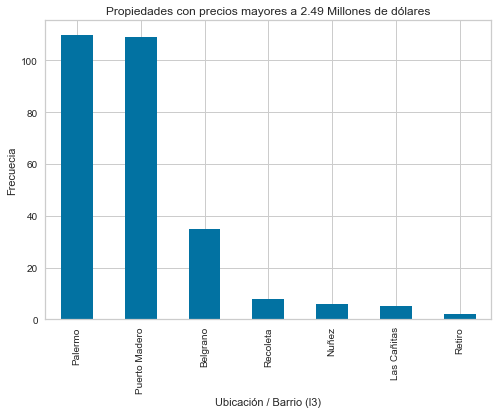

time: 250 ms (started: 2021-06-14 23:07:48 -03:00)


In [76]:
df_price_outliers.value_counts(df_price_outliers['l3']).plot.bar()
plt.title('Propiedades con precios mayores a 2.49 Millones de dólares')
plt.xlabel('Ubicación / Barrio (l3)')
plt.ylabel('Frecuecia')
#train_data['car_insurance'].value_counts()

__Gráfica 21:__ Este gráfico de barras muestra la alta concentración (>100) de propiedades de precios excepcionalmente altos en los barrios Puerto Madero y Palermo.
___

__Análisis y comprensión de outliers:__ en este apartado se realizó una exploración de los datos, enfocada a conocer un poco más sobre las razones que explican el origen de los precios atípicos de las propiedades que resaltan como outliers, más allá de las justificaciones que pueden interpretarse de las columnas restantes en el dataframe (l3, rooms, bedrooms, bathrooms, surface_total, surface_covered, property_type). Llama la atención el alto precio y la cantidad de propiedades con esta condición.

Se trajo de vuelta temporalmente la columna "title" que contiene información explicativa de características adicionales de las propiedades con precios excepcionalmente altos. Como resultado, se tiene un mejor entendimiento de los precios de estas propiedades debido a la exclusividad de la ubicacion y distribución de espacios, por ejemplo, apartamentos en torres de lujo, ubicaciones en avenidas importantes, propiedades tipo duplex entre otras caracyerísticas descritas en esta columna temporalmente agregada. 

### j.2.-  Detección y eliminación de Outliers: Eliminación

In [77]:
prueba= datos_proper_SPR02_f4_IMP.copy()

time: 0 ns (started: 2021-06-14 23:07:49 -03:00)


In [79]:
### ESTA CELDA PUEDE DAR ERROR AL EJECUTARLA UNA VEZ PERO AL EJECUTARLA NUEVAMENTE, CORRE SIN PROBLEMAS
# Eliminación de los valores atípicos por barrio "l3"
indexNames_PuerMad= prueba[ (prueba['l3'] == 'Puerto Madero') & (prueba['price'] > 2200000) ].index
indexNames_LasCani= prueba[ (prueba['l3'] == 'Las Cañitas') & (prueba['price'] > 1050000) ].index
indexNames_Recole= prueba[ (prueba['l3'] == 'Recoleta') & (prueba['price'] > 750000) ].index
indexNames_Belgran= prueba[ (prueba['l3'] == 'Belgrano') & (prueba['price'] > 650000) ].index
indexNames_BarrioNor= prueba[ (prueba['l3'] == 'Barrio Norte') & (prueba['price'] > 550000) ].index
indexNames_Pal= prueba[ (prueba['l3'] == 'Palermo') & (prueba['price'] > 480000) ].index
indexNames_Nunez= prueba[ (prueba['l3'] == 'Nuñez') & (prueba['price'] > 490000) ].index
indexNames_Retiro= prueba[ (prueba['l3'] == 'Retiro') & (prueba['price'] > 750000) ].index
indexNames_VillaDev= prueba[ (prueba['l3'] == 'Villa Devoto') & (prueba['price'] > 450000) ].index
indexNames_Barracas= prueba[ (prueba['l3'] == 'Barracas') & (prueba['price'] > 440000) ].index
indexNames_Coghlan= prueba[ (prueba['l3'] == 'Coghlan') & (prueba['price'] > 420000) ].index
indexNames_VillaUrq= prueba[ (prueba['l3'] == 'Villa Urquiza') & (prueba['price'] > 410000) ].index
indexNames_Caballito= prueba[ (prueba['l3'] == 'Caballito') & (prueba['price'] > 490000) ].index
indexNames_Almagro= prueba[ (prueba['l3'] == 'Almagro') & (prueba['price'] > 410000) ].index
indexNames_Parqcent= prueba[ (prueba['l3'] == 'Parque Centenario') & (prueba['price'] > 420000) ].index
indexNames_Saavedra= prueba[ (prueba['l3'] == 'Saavedra') & (prueba['price'] > 405000) ].index
indexNames_Abasto= prueba[ (prueba['l3'] == 'Abasto') & (prueba['price'] > 430000) ].index
indexNames_Caballi= prueba[ (prueba['l3'] == 'Caballito') & (prueba['price'] > 430000) ].index
indexNames_Colegial= prueba[ (prueba['l3'] == 'Colegiales') & (prueba['price'] > 410000) ].index
indexNames_VillaPuey= prueba[ (prueba['l3'] == 'Villa Pueyrredón') & (prueba['price'] > 400000) ].index
indexNames_VilladelPar= prueba[ (prueba['l3'] == 'Villa del Parque') & (prueba['price'] > 360000) ].index
indexNames_VillaOrtuzar= prueba[ (prueba['l3'] == 'Villa Ortuzar') & (prueba['price'] > 490000) ].index
indexNames_Versalles= prueba[ (prueba['l3'] == 'Versalles') & (prueba['price'] > 330000) ].index
indexNames_Chacarita= prueba[ (prueba['l3'] == 'Chacarita') & (prueba['price'] > 380000) ].index
indexNames_Mataderos= prueba[ (prueba['l3'] == 'Mataderos') & (prueba['price'] > 360000) ].index
indexNames_ParqChas= prueba[ (prueba['l3'] == 'Parque Chas') & (prueba['price'] > 470000) ].index
indexNames_Paternal= prueba[ (prueba['l3'] == 'Paternal') & (prueba['price'] > 420000) ].index
indexNames_Flores= prueba[ (prueba['l3'] == 'Flores') & (prueba['price'] > 400000) ].index
indexNames_Agronomia= prueba[ (prueba['l3'] == 'Agronomía') & (prueba['price'] > 330000) ].index
indexNames_VillaCrespo= prueba[ (prueba['l3'] == 'Villa Crespo') & (prueba['price'] > 330000) ].index
indexNames_SanTelmo= prueba[ (prueba['l3'] == 'San Telmo') & (prueba['price'] > 330000) ].index

# Filtrado de outliers por cutoff 1 
cutoff1= 380000
indexNames_VillaLuro= prueba[ (prueba['l3'] == 'Villa Luro') & (prueba['price'] > cutoff1) ].index
indexNames_ParqChac= prueba[ (prueba['l3'] == 'Parque Chacabuco') & (prueba['price'] > cutoff1) ].index
indexNames_Once= prueba[ (prueba['l3'] == 'Once') & (prueba['price'] > cutoff1) ].index
indexNames_VillaStaRita= prueba[ (prueba['l3'] == 'Villa Santa Rita') & (prueba['price'] > cutoff1) ].index
indexNames_VelezSars= prueba[ (prueba['l3'] == 'Velez Sarsfield') & (prueba['price'] > cutoff1) ].index
indexNames_Centro= prueba[ (prueba['l3'] == 'Centro / Microcentro') & (prueba['price'] > cutoff1) ].index
indexNames_VillaGralMitre= prueba[ (prueba['l3'] == 'Villa General Mitre') & (prueba['price'] > cutoff1) ].index

# Filtrado de outliers por cutoff 1 
cutoff2= 330000
indexNames_Pompey= prueba[ (prueba['l3'] == 'Pompeya') & (prueba['price'] > cutoff2) ].index
indexNames_Linier= prueba[ (prueba['l3'] == 'Liniers') & (prueba['price'] > cutoff2) ].index
indexNames_VillaReal= prueba[ (prueba['l3'] == 'Villa Real') & (prueba['price'] > cutoff2) ].index
indexNames_VillaRiach= prueba[ (prueba['l3'] == 'Villa Riachuelo') & (prueba['price'] > cutoff2) ].index
indexNames_Boedo= prueba[ (prueba['l3'] == 'Boedo') & (prueba['price'] > cutoff2) ].index
indexNames_MonteCast= prueba[ (prueba['l3'] == 'Monte Castro') & (prueba['price'] > cutoff2) ].index
indexNames_Floresta= prueba[ (prueba['l3'] == 'Floresta') & (prueba['price'] > cutoff2) ].index
indexNames_ParqPatric= prueba[ (prueba['l3'] == 'Parque Patricios') & (prueba['price'] > cutoff2) ].index
indexNames_Balvaner= prueba[ (prueba['l3'] == 'Balvanera') & (prueba['price'] > cutoff2) ].index
indexNames_Congreso= prueba[ (prueba['l3'] == 'Congreso') & (prueba['price'] > cutoff2) ].index
indexNames_Monserrat= prueba[ (prueba['l3'] == 'Monserrat') & (prueba['price'] > cutoff2) ].index
indexNames_ParqAve= prueba[ (prueba['l3'] == 'Parque Avellaneda') & (prueba['price'] > cutoff2) ].index
indexNames_Tribunales= prueba[ (prueba['l3'] == 'Tribunales') & (prueba['price'] > cutoff2) ].index
indexNames_SanCrist= prueba[ (prueba['l3'] == 'San Cristobal') & (prueba['price'] > cutoff2) ].index
indexNames_SanNico= prueba[ (prueba['l3'] == 'San Nicolás') & (prueba['price'] > cutoff2) ].index
indexNames_Boca= prueba[ (prueba['l3'] == 'Boca') & (prueba['price'] > cutoff2) ].index
indexNames_VillaLug= prueba[ (prueba['l3'] == 'Villa Lugano') & (prueba['price'] > cutoff2) ].index
indexNames_VillaSold= prueba[ (prueba['l3'] == 'Villa Soldati') & (prueba['price'] > cutoff2) ].index
indexNames_Constitucion= prueba[ (prueba['l3'] == 'Constitución') & (prueba['price'] > cutoff2) ].index
#indexNames_Chacarita= prueba[ (prueba['l3'] == 'Chacarita') & (prueba['price'] > 380000) ].index


prueba.drop(indexNames_PuerMad, inplace=True)
prueba.drop(indexNames_LasCani, inplace=True)
prueba.drop(indexNames_Recole, inplace=True)
prueba.drop(indexNames_Belgran, inplace=True)
prueba.drop(indexNames_BarrioNor, inplace=True)
prueba.drop(indexNames_Pal, inplace=True)
prueba.drop(indexNames_Nunez, inplace=True)
prueba.drop(indexNames_Retiro, inplace=True)
prueba.drop(indexNames_VillaDev, inplace=True)
prueba.drop(indexNames_Barracas, inplace=True)
prueba.drop(indexNames_Coghlan, inplace=True)
prueba.drop(indexNames_VillaUrq, inplace=True)
prueba.drop(indexNames_Caballito, inplace=True)
prueba.drop(indexNames_Almagro, inplace=True)
prueba.drop(indexNames_Parqcent, inplace=True)
prueba.drop(indexNames_Saavedra, inplace=True)
prueba.drop(indexNames_Abasto, inplace=True)
prueba.drop(indexNames_Caballi, inplace=True)
prueba.drop(indexNames_Colegial, inplace=True)
prueba.drop(indexNames_VillaPuey, inplace=True)
prueba.drop(indexNames_VilladelPar, inplace=True)
prueba.drop(indexNames_VillaOrtuzar, inplace=True)
prueba.drop(indexNames_Versalles, inplace=True)
prueba.drop(indexNames_Chacarita, inplace=True)
prueba.drop(indexNames_Mataderos, inplace=True)
prueba.drop(indexNames_ParqChas, inplace=True)
prueba.drop(indexNames_Paternal, inplace=True)
prueba.drop(indexNames_Flores, inplace=True)
prueba.drop(indexNames_Agronomia, inplace=True)
prueba.drop(indexNames_VillaCrespo, inplace=True)
prueba.drop(indexNames_SanTelmo, inplace=True)
prueba.drop(indexNames_VillaLuro, inplace=True)
prueba.drop(indexNames_ParqChac, inplace=True)
prueba.drop(indexNames_Once, inplace=True)
prueba.drop(indexNames_VillaStaRita, inplace=True)
prueba.drop(indexNames_VelezSars, inplace=True)
prueba.drop(indexNames_Centro, inplace=True)
prueba.drop(indexNames_VillaGralMitre, inplace=True)
prueba.drop(indexNames_Pompey, inplace=True)
prueba.drop(indexNames_Linier, inplace=True)
prueba.drop(indexNames_VillaReal, inplace=True)
prueba.drop(indexNames_VillaRiach, inplace=True)
prueba.drop(indexNames_Boedo, inplace=True)
prueba.drop(indexNames_MonteCast, inplace=True)
prueba.drop(indexNames_Floresta, inplace=True)
prueba.drop(indexNames_ParqPatric, inplace=True)
prueba.drop(indexNames_Balvaner, inplace=True)
prueba.drop(indexNames_Congreso, inplace=True)
prueba.drop(indexNames_Monserrat, inplace=True)
prueba.drop(indexNames_ParqAve, inplace=True)
prueba.drop(indexNames_Tribunales, inplace=True)
prueba.drop(indexNames_SanCrist, inplace=True)
prueba.drop(indexNames_SanNico, inplace=True)
prueba.drop(indexNames_Boca, inplace=True)
prueba.drop(indexNames_VillaLug, inplace=True)
prueba.drop(indexNames_VillaSold, inplace=True)
prueba.drop(indexNames_Constitucion, inplace=True)

time: 953 ms (started: 2021-06-14 23:11:26 -03:00)


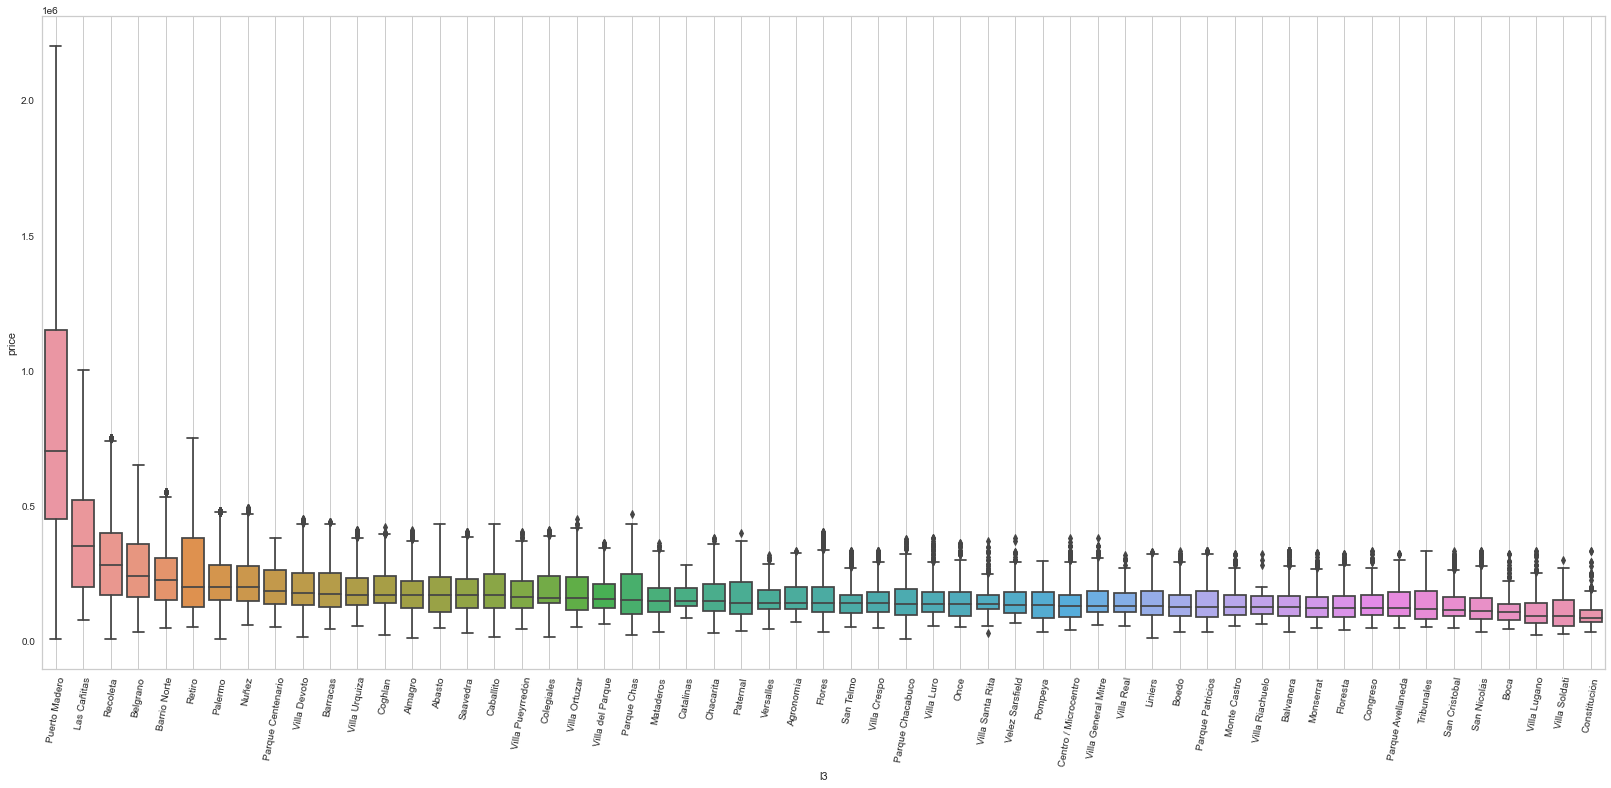

time: 2.25 s (started: 2021-06-14 23:11:36 -03:00)


In [80]:
# Visualizando la distribucion de los valores de la variable categórica: tipos de propiedad
plt.figure(figsize=(28,12))


grouped = prueba.loc[:,['l3', 'price']] \
    .groupby(['l3']) \
    .median() \
    .sort_values(by='price', ascending= False)

fig.suptitle('Distribución de el precio de las propiedades (filtradas)')
ax= sns.boxplot( data= prueba, x='l3' , y='price', order=grouped.index)
#ax.set_yscale('log')

plt.setp(ax.get_xticklabels(), rotation=80)
plt.grid()
plt.show()

__Gráfica 22.__ Este gráfico de cajas sirve para validar la eliminación la gran mayoría de outliers.

## k.- Codificación de variables categóricas: Encoding

In [81]:
#Se realiza la eliminación de la columna title usada para la comprensión de los outliers
datos_proper_SPR02_Encod= prueba.copy()
datos_proper_SPR02_Encod.drop('title', axis=1, inplace=True)
datos_proper_SPR02_Encod

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...
146548,Palermo,3.0,2.0,2.0,82.0,82.0,475000.0,Departamento
146549,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH
146550,Palermo,5.0,2.0,2.0,114.0,95.0,298000.0,PH
146555,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH


time: 16 ms (started: 2021-06-14 23:11:45 -03:00)


In [82]:
# Aplicamos el método get_dummies de Pandas para obtener variables binarias de cada categoría de las columnas 'l3' y 'property_type'
datos_proper_SPR02_Encod2 = pd.get_dummies(datos_proper_SPR02_Encod, columns=['l3','property_type'] )
#datos_proper_SPR02_Encod.drop(['l3','property_type'], axis=1)
datos_proper_SPR02_Encod2

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
0,7.0,7.0,2.0,140.0,140.0,153000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146548,3.0,2.0,2.0,82.0,82.0,475000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146549,3.0,2.0,1.0,84.0,84.0,178000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146550,5.0,2.0,2.0,114.0,95.0,298000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146555,3.0,2.0,2.0,144.0,134.0,480000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


time: 79 ms (started: 2021-06-14 23:11:52 -03:00)


In [83]:
datos_proper_SPR02_Encod2.columns

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'l3_Abasto', 'l3_Agronomía', 'l3_Almagro', 'l3_Balvanera',
       'l3_Barracas', 'l3_Barrio Norte', 'l3_Belgrano', 'l3_Boca', 'l3_Boedo',
       'l3_Caballito', 'l3_Catalinas', 'l3_Centro / Microcentro',
       'l3_Chacarita', 'l3_Coghlan', 'l3_Colegiales', 'l3_Congreso',
       'l3_Constitución', 'l3_Flores', 'l3_Floresta', 'l3_Las Cañitas',
       'l3_Liniers', 'l3_Mataderos', 'l3_Monserrat', 'l3_Monte Castro',
       'l3_Nuñez', 'l3_Once', 'l3_Palermo', 'l3_Parque Avellaneda',
       'l3_Parque Centenario', 'l3_Parque Chacabuco', 'l3_Parque Chas',
       'l3_Parque Patricios', 'l3_Paternal', 'l3_Pompeya', 'l3_Puerto Madero',
       'l3_Recoleta', 'l3_Retiro', 'l3_Saavedra', 'l3_San Cristobal',
       'l3_San Nicolás', 'l3_San Telmo', 'l3_Tribunales', 'l3_Velez Sarsfield',
       'l3_Versalles', 'l3_Villa Crespo', 'l3_Villa Devoto',
       'l3_Villa General Mitre', 'l3_Villa Lugano', 'l3_Vill

time: 0 ns (started: 2021-06-14 23:11:52 -03:00)


## l.- Preprocesamiento para el modelado: Standard Scaler

Aplicamos el algoritmo StandardScaler()

In [84]:
columns=(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'l3_Abasto', 'l3_Agronomía', 'l3_Almagro', 'l3_Balvanera',
       'l3_Barracas', 'l3_Barrio Norte', 'l3_Belgrano', 'l3_Boca', 'l3_Boedo',
       'l3_Caballito', 'l3_Catalinas', 'l3_Centro / Microcentro',
       'l3_Chacarita', 'l3_Coghlan', 'l3_Colegiales', 'l3_Congreso',
       'l3_Constitución', 'l3_Flores', 'l3_Floresta', 'l3_Las Cañitas',
       'l3_Liniers', 'l3_Mataderos', 'l3_Monserrat', 'l3_Monte Castro',
       'l3_Nuñez', 'l3_Once', 'l3_Palermo', 'l3_Parque Avellaneda',
       'l3_Parque Centenario', 'l3_Parque Chacabuco', 'l3_Parque Chas',
       'l3_Parque Patricios', 'l3_Paternal', 'l3_Pompeya', 'l3_Puerto Madero',
       'l3_Recoleta', 'l3_Retiro', 'l3_Saavedra', 'l3_San Cristobal',
       'l3_San Nicolás', 'l3_San Telmo', 'l3_Tribunales', 'l3_Velez Sarsfield',
       'l3_Versalles', 'l3_Villa Crespo', 'l3_Villa Devoto',
       'l3_Villa General Mitre', 'l3_Villa Lugano', 'l3_Villa Luro',
       'l3_Villa Ortuzar', 'l3_Villa Pueyrredón', 'l3_Villa Real',
       'l3_Villa Riachuelo', 'l3_Villa Santa Rita', 'l3_Villa Soldati',
       'l3_Villa Urquiza', 'l3_Villa del Parque', 'property_type_Casa',
       'property_type_Departamento', 'property_type_PH'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_proper_for_Model= scaler.fit_transform(datos_proper_SPR02_Encod2)
datos_proper_for_Model = pd.DataFrame(datos_proper_for_Model, columns = columns)
datos_proper_for_Model

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
0,3.618398,5.337939,0.807739,1.084834,0.593698,-0.364210,-0.073424,-0.043187,-0.312348,-0.178725,...,-0.091842,-0.040677,-0.022326,-0.062838,-0.029205,-0.196728,-0.126374,-0.139256,0.400778,-0.368173
1,-0.744608,-0.926682,0.807739,-0.228818,-0.132586,-0.325417,-0.073424,-0.043187,-0.312348,-0.178725,...,-0.091842,-0.040677,-0.022326,-0.062838,-0.029205,-0.196728,-0.126374,-0.139256,-2.495145,2.716112
2,-0.744608,-0.926682,-0.612573,-0.697979,-0.247728,-0.545242,-0.073424,-0.043187,-0.312348,-0.178725,...,-0.091842,-0.040677,-0.022326,-0.062838,-0.029205,-0.196728,-0.126374,-0.139256,-2.495145,2.716112
3,-0.744608,-0.926682,-0.612573,0.052679,-0.203443,0.553881,-0.073424,-0.043187,-0.312348,-0.178725,...,-0.091842,-0.040677,-0.022326,-0.062838,-0.029205,-0.196728,-0.126374,-0.139256,-2.495145,2.716112
4,-0.744608,-0.926682,-0.612573,-0.491548,-0.150300,-0.383606,-0.073424,-0.043187,-0.312348,-0.178725,...,-0.091842,-0.040677,-0.022326,-0.062838,-0.029205,-0.196728,-0.126374,-0.139256,-2.495145,2.716112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76270,0.127993,0.117421,0.807739,-0.003620,0.079985,1.717659,-0.073424,-0.043187,-0.312348,-0.178725,...,-0.091842,-0.040677,-0.022326,-0.062838,-0.029205,-0.196728,-0.126374,-0.139256,0.400778,-0.368173
76271,0.127993,0.117421,-0.612573,0.033913,0.097699,-0.202574,-0.073424,-0.043187,-0.312348,-0.178725,...,-0.091842,-0.040677,-0.022326,-0.062838,-0.029205,-0.196728,-0.126374,-0.139256,-2.495145,2.716112
76272,1.873196,0.117421,0.807739,0.596906,0.195128,0.573278,-0.073424,-0.043187,-0.312348,-0.178725,...,-0.091842,-0.040677,-0.022326,-0.062838,-0.029205,-0.196728,-0.126374,-0.139256,-2.495145,2.716112
76273,0.127993,0.117421,0.807739,1.159900,0.540555,1.749986,-0.073424,-0.043187,-0.312348,-0.178725,...,-0.091842,-0.040677,-0.022326,-0.062838,-0.029205,-0.196728,-0.126374,-0.139256,-2.495145,2.716112


time: 219 ms (started: 2021-06-14 23:11:52 -03:00)


## Justificación de las transformaciones de datos implementadas:

* [x] Imputación de valores faltantes
* [x] Detección y eliminación de Outliers
* [x] Encoding
* [X] Escalado de datos
* [ ] Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA)

Posterior al filtrado de los datos aplicado de manera similar que en el SPRINT 01, se realizó el tratamiento de los valores faltantes detectando e imputando los mismos. Se detectaron las columnas __'bathrooms' con 1.07%__ y __'surface_covered' con 0.63% de datos faltantes__. 

Para la columna 'bathrooms' siendo de tipo numérica entera, los valores faltantes fueron imputados usando la moda (valor que más se repite), y para la columna 'surface_covered' por contener datos de tipo numéricos float, le fueron imputados los valores faltantes con el valor de la media de los valores presentes.

Para ambas columnas fueron analizados los valores del parámetro media antes y despúes de la imputación para verificar que no fueran afectados de manera significativa.

## m.- Partición de datos de entrenamiento y prueba

In [85]:
# Definición del target y variables independientes
X = datos_proper_SPR02_Encod2.drop(["price"], axis= 1) 
y = datos_proper_SPR02_Encod2.price

time: 16 ms (started: 2021-06-14 23:11:52 -03:00)


In [86]:
# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

time: 47 ms (started: 2021-06-14 23:11:52 -03:00)


In [87]:
# Chequeando datos de X:
print('X_train', X_train.shape)
print('X_test', X_test.shape)

# Chequeando datos de y:
print('y_train', y_train.shape)
print('y_test', y_test.shape)


X_train (53392, 65)
X_test (22883, 65)
y_train (53392,)
y_test (22883,)
time: 0 ns (started: 2021-06-14 23:11:52 -03:00)


## __Parte B Modelos avanzados__

 __Objetivo:__ en la Parte B, al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando).



## Definición de modelos:

En el __SPRINT 01__ se entrenaron modelos:

1. Un modelo basado en Regresión lineal (modelo benchmark sin optimización)
2. Dos modelos basados en Vecinos más cercanos KNN (un modelo por defecto y uno optimizado por el número de vecinos óptimo en función del performance analizado en la gráfica 15 del SPRINT 01)
3. Dos modelos basados en Árboles de decisión DT (un modelo por defecto y uno optimizado por la profundidad máxima del árbol en función del performance analizado en la gráfica 16 del SPRINT 01)

En esta parte B del __SPRINT 02__ se entrenarán los modelos de:

1. __Vecinos más cercanos KNN ingenuo__, definifido en el apartado F del SPRINT 01 como _modelo_KNNi_ y que será optimizado usando __Grid Search__ para la selección de los mejores hiperparámetros y se analizará la __importacia de features__ para probar su posible contribución al performance del modelo, y seleccionar posiblemente solo aquellas que tengan mayor contribución a la explicabilidad de la variable objetivo.

2. __Árboles de decisión DT__ model ingenuo definido en el apartado F del SPRINT 01 como _modelo_DTi_ que será entrenado con hiperparámetros obtenidos a través de Cross Validation, usando como insumo las posibles features más importantes obtenidas del proceso anterior.

3. __Modelo de ensamble XGBoost__ que será entrenado con hiperparámetros definidos manualmente tras varios experimentos al tanteo.


In [88]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

time: 15 ms (started: 2021-06-14 23:11:52 -03:00)


## n.- Optimización del modelo KNN del SPRINT 01 aplicando Grid Search

In [90]:
# Grilla para Grid Search
param_grid = {'n_neighbors':np.arange(1, 10),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree']}

time: 0 ns (started: 2021-06-14 23:11:52 -03:00)


In [91]:
# Definimos la optimización Grid Search usando como insumo el modelo KNN ingenuo entrenado en el SPRINT 01
modelo_KNN_GridSearch = GridSearchCV(modelo_KNNi, param_grid=param_grid, cv=5)

time: 0 ns (started: 2021-06-14 23:11:52 -03:00)


In [92]:
### ESTA CELDA TARDA ALREDEDOR DE 1 HORA EJECUTÁNDOSE
# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
modelo_KNN_GridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=20),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

time: 53min 55s (started: 2021-06-14 23:11:52 -03:00)


In [93]:
# Grilla con mejores hiperparámetros
#GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=20),
#             param_grid={'algorithm': ['auto', 'kd_tree'],
#                         'leaf_size': [1, 3, 5, 7, 10],
#                         'n_neighbors': array([1, 2, 3, 4, 5]),
#                         'weights': ['uniform', 'distance']})
#time: 51min 15s (started: 2021-05-17 00:17:38 -03:00)

time: 16 ms (started: 2021-06-15 00:05:48 -03:00)


In [94]:
# Verificamos los mejores parámetros de definición de un modelo basado en el algoritmo KNN 
print("Mejores hiperparametros: "+str(modelo_KNN_GridSearch.best_params_))
print("Mejor Score: "+str(modelo_KNN_GridSearch.best_score_)+'\n')

Mejores hiperparametros: {'algorithm': 'kd_tree', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'distance'}
Mejor Score: 0.8140248358384635

time: 16 ms (started: 2021-06-15 00:05:48 -03:00)


__Optimización con Grid Search:__

Tras la definición de la grid de parámetros a utilizar para que el algoritmo Grid Search (GS) realizara de forma automática las diferentes combinatorias de hiperparámetros, se pudo apreciar que este procedimiento demanda un alto costo computacional que se tradujo en tiempos entre 45 y 51 minutos para finalizar la operación. A fines demostrativos se hicieron varia pruebas con varios parametros en la grid.

Los mejores hiperparámetros para el modelo según la optimización por GS fue __Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}__, con un __Mejor Score: 0.8110641708131883.__
___

In [95]:
# Verificamos la tabla con los resultados de las realizaciones recorriendo los diversos hiperparámetros definidos para la optimización por Grid Search
dfscores_modelo_KNN_GridSearch = pd.DataFrame(modelo_KNN_GridSearch.cv_results_)
dfscores_modelo_KNN_GridSearch.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.093293,0.084903,11.695501,3.871869,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.750928,0.748062,0.740180,0.774868,0.752839,0.753376,0.011580,55
1,0.037571,0.005604,6.835938,0.310927,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.750928,0.748062,0.740180,0.774868,0.752839,0.753376,0.011580,55
2,0.031683,0.005152,7.485746,0.313870,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.738317,0.742217,0.762670,0.774050,0.767313,0.756913,0.014119,49
3,0.028645,0.002544,7.148923,0.297633,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.765631,0.772109,0.787695,0.807863,0.789042,0.784468,0.014739,43
4,0.029719,0.002293,8.101928,0.370084,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.727662,0.760960,0.750414,0.760886,0.772492,0.754483,0.015121,52


time: 156 ms (started: 2021-06-15 00:05:48 -03:00)


__Tabla XX:__

___

### Predicción del modelo KNN optimizado por Grid Search sobre los datos de prueba

In [96]:
#Predecimos en los datos de test
prediction_modelo_GridSearch = modelo_KNN_GridSearch.predict(X_test)

time: 6.61 s (started: 2021-06-15 00:05:48 -03:00)


In [97]:
prediction_modelo_GridSearch

array([130000.        , 217250.        , 209089.58791671, ...,
       174625.        , 186418.75      , 155000.        ])

time: 15 ms (started: 2021-06-15 00:05:55 -03:00)


In [98]:
# Mostramos los scores del desempeño del modelo
print('KNNi_Grid_Search Mean Absolute Error: ',("{:.3f}".format(mean_absolute_error(y_test, prediction_modelo_GridSearch))))
print('KNNi_Grid_Search Mean Squared Error: ',("{:.3f}".format(mean_squared_error(y_test, prediction_modelo_GridSearch))))
print('KNNi_Grid_Search Explained Variance Score: ',("{:.3f}".format(explained_variance_score(y_test, prediction_modelo_GridSearch))))
print('KNNi_Grid_Search R2 Score:',("{:.3f}".format(r2_score(y_test, prediction_modelo_GridSearch))))

KNNi_Grid_Search Mean Absolute Error:  26072.413
KNNi_Grid_Search Mean Squared Error:  3898528171.355
KNNi_Grid_Search Explained Variance Score:  0.835
KNNi_Grid_Search R2 Score: 0.834
time: 16 ms (started: 2021-06-15 00:05:55 -03:00)


## n.1.- Comprobación con modelo definido directamente desde el inicio con los mejores hiperparámetros obtenidos de la optimización con Grid Search:
 - Mejores hiperpárametros= {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}

In [99]:
# Definimos el modelo KNN utilizando los mejores hiperparámetros deducidos por Grid Search
modelo_KNN_OPT_best = KNeighborsRegressor(algorithm= 'auto', leaf_size= 1, n_neighbors= 8, weights= 'distance')

time: 0 ns (started: 2021-06-15 00:05:55 -03:00)


In [100]:
# Entrenamos el modelo KNN
modelo_KNN_OPT_best.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=1, n_neighbors=8, weights='distance')

time: 16 ms (started: 2021-06-15 00:05:55 -03:00)


In [101]:
# Instanciamos el ejercicio de predicción
prediction_modelo_KNN_OPT_best= modelo_KNN_OPT_best.predict(X_test)

time: 31 s (started: 2021-06-15 00:05:55 -03:00)


In [102]:
# Mostramos los scores del desempeño del modelo
print('KNNi_Grid_Search Mean Absolute Error: ',("{:.3f}".format(mean_absolute_error(y_test, prediction_modelo_KNN_OPT_best))))
print('KNNi_Grid_Search Mean Squared Error: ',("{:.3f}".format(mean_squared_error(y_test, prediction_modelo_KNN_OPT_best))))
print('KNNi_Grid_Search Explained Variance Score: ',("{:.3f}".format(explained_variance_score(y_test, prediction_modelo_KNN_OPT_best))))
print('KNNi_Grid_Search R2 Score:',("{:.3f}".format(r2_score(y_test, prediction_modelo_KNN_OPT_best))))

KNNi_Grid_Search Mean Absolute Error:  26126.425
KNNi_Grid_Search Mean Squared Error:  3887329002.901
KNNi_Grid_Search Explained Variance Score:  0.835
KNNi_Grid_Search R2 Score: 0.835
time: 109 ms (started: 2021-06-15 00:06:26 -03:00)


## o.- Importancia de features

Best alpha using built-in RidgeCV: 1.000000
Best score using built-in RidgeCV: 0.743784
Ridge picked 65 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Importancia de features usando el modelo Ridge')

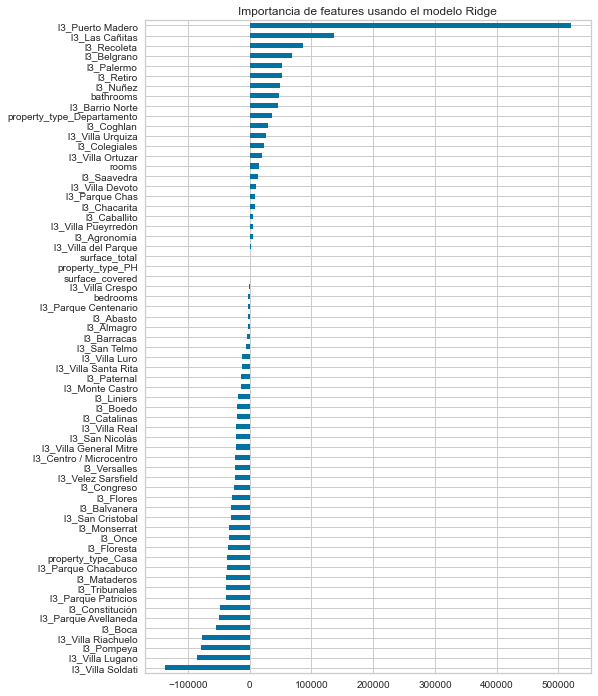

time: 3.28 s (started: 2021-06-15 00:06:26 -03:00)


In [103]:
# 
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = RidgeCV()
reg.fit(X, y)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 12.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de features usando el modelo Ridge")

__Gráfica 23:__ Gráfico de barras mostrando la importancia de cada una de las variables independientes usadas para entrenar los modelos.
___

## p.- Selección de variables independientes de mayor importancia en el modelo según Ridge:

In [104]:
# Definición del target y variables independientes seleccionadas según el modelo Ridge
Xfi = datos_proper_SPR02_Encod2.drop(["price", 'bedrooms', 'l3_Abasto',  'l3_Almagro', 'l3_Balvanera',
       'l3_Barracas','l3_Boca','l3_Boedo',
          'l3_Catalinas','l3_Centro / Microcentro',
          'l3_Congreso','l3_Constitución', 'l3_Flores', 
          'l3_Floresta', 'l3_Liniers','l3_Mataderos', 
          'l3_Monserrat','l3_Monte Castro', 'l3_Once', 
          'l3_Parque Avellaneda', 'l3_Parque Centenario','l3_Parque Chacabuco', 
          'l3_Parque Patricios', 'l3_Paternal','l3_Pompeya',
          'l3_San Cristobal','l3_San Nicolás', 'l3_San Telmo', 
          'l3_Tribunales', 'l3_Velez Sarsfield', 'l3_Versalles', 
          'l3_Villa Crespo', 'l3_Villa General Mitre', 'l3_Villa Lugano', 
          'l3_Villa Luro','l3_Villa Real', 'l3_Villa Riachuelo', 
          'l3_Villa Santa Rita', 'l3_Villa Soldati','property_type_Casa'], axis= 1) 
yfi = datos_proper_SPR02_Encod2.price

time: 47 ms (started: 2021-06-15 00:06:30 -03:00)


#### Repetimos el train/test split con el mismo test_size y misma semilla:

In [105]:
# Train / test split
X_trainfi, X_testfi, y_trainfi, y_testfi = train_test_split(Xfi, yfi, test_size=0.3, random_state=42)

time: 78 ms (started: 2021-06-15 00:06:30 -03:00)


#### Entrenamos nuevamente el modelo KNN usando los hiperparámetros obtenidos en la optimización con Grid Search y usando la selección de variables proveniente del feature importance usando Ridge:

In [106]:
# Definimos un modelo con las features que aportan mayor explicabilidad al modelo
modelo_KNN_FeatImp = KNeighborsRegressor(algorithm= 'auto', leaf_size= 1, n_neighbors= 8, weights= 'distance')

# Entrenamos el modelo KNN con las features seleccionadas 
modelo_KNN_FeatImp.fit(X_trainfi, y_trainfi)

KNeighborsRegressor(leaf_size=1, n_neighbors=8, weights='distance')

time: 32 ms (started: 2021-06-15 00:06:30 -03:00)


In [107]:
# Instanciamos el ejercicio de predicción
prediction_modelo_KNN_FeatImp= modelo_KNN_FeatImp.predict(X_testfi)

time: 25.2 s (started: 2021-06-15 00:06:30 -03:00)


In [108]:
# Mostramos los scores del desempeño del modelo KNN con las features seleccionadas
print('modelo_KNN_FeatImp Mean Absolute Error: ',("{:.3f}".format(mean_absolute_error(y_testfi, prediction_modelo_KNN_FeatImp))))
print('modelo_KNN_FeatImp Mean Squared Error: ',("{:.3f}".format(mean_squared_error(y_testfi, prediction_modelo_KNN_FeatImp))))
print('modelo_KNN_FeatImp Explained Variance Score: ',("{:.3f}".format(explained_variance_score(y_testfi, prediction_modelo_KNN_FeatImp))))
print('modelo_KNN_FeatImp R2 Score:',("{:.3f}".format(r2_score(y_testfi, prediction_modelo_KNN_FeatImp))))

modelo_KNN_FeatImp Mean Absolute Error:  27020.994
modelo_KNN_FeatImp Mean Squared Error:  3798628122.514
modelo_KNN_FeatImp Explained Variance Score:  0.839
modelo_KNN_FeatImp R2 Score: 0.839
time: 0 ns (started: 2021-06-15 00:06:55 -03:00)


__Análisis:__ el modelo KNN incialmente optimizado usando Grid Search (GS), fue combinado con la selección de las variables que aportaron mayor explicabilidad al modelo según lo analizado en la tabla 23. La combinación de estos dos procedimientos de optimización dieron como resultado un modelo KNN que contenía 65 variables independientes y mostraba un R2 de 0.832, a un modelo que usando 25 variables independientes (apenas el 38% de las usadas incialmente) mostró un desempeño en R2 de 0.839.

Esto representa una mejora significativa en la estructura del modelo al mantener un desempeño equivalente usando menos del 40% de las variables independientes generadas durante la limpieza y transformación del set de datos original.

---

## p.- Prueba de optimización de modelos ingenuos usando cross validation:

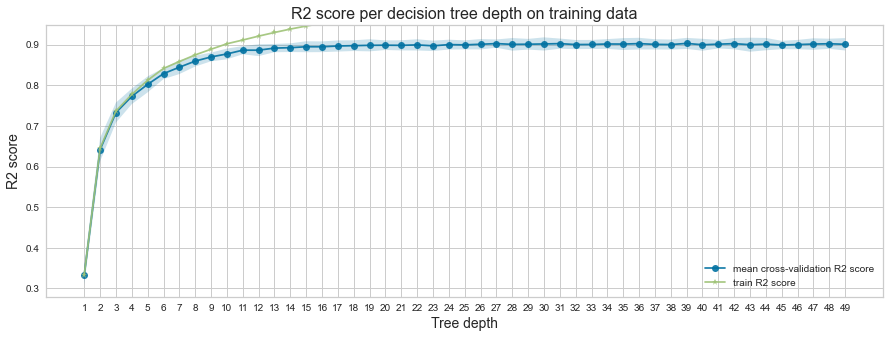

time: 2min 16s (started: 2021-06-15 00:06:55 -03:00)


In [109]:
#Optimización de la profundidad de árboles en base al score R2
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score 

# Función para entrenar los árboles probando varias profundidades sobre la training data usando CV
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='r2'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    r2_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeRegressor(max_depth=depth, random_state= 42) ###
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        r2_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    r2_scores = np.array(r2_scores)
    return cv_scores_mean, cv_scores_std, r2_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, r2_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation R2 score', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, r2_scores, '-*', label='train R2 score', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('R2 score', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,50)
sm_cv_scores_mean, sm_cv_scores_std, sm_r2_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_r2_scores, 
                               'R2 score per decision tree depth on training data')



__Gráfica 24:__ muestra la profundidad de árboles en función del score R2 óptimo para ser usado en la optimización del modelo de árboles de decisión.
___

In [110]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('La profundidad de-{} árboles alcanza el mejor valor de la media de R2 {} +/- {}% sobre el set de datos de entrenamiento'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


La profundidad de-39 árboles alcanza el mejor valor de la media de R2 90.30052 +/- 0.68167% sobre el set de datos de entrenamiento
time: 0 ns (started: 2021-06-15 00:09:12 -03:00)


## q.- Definimos un modelo de árboles de decisión optimizado por Cross Validation:

Este modelo será entrenado usando la selección de features obtenida de la regularización Ridge en el apartado "o" y con la profundidad de árboles obtenida por CV en el apartado "p"

In [121]:
# Definimos la optimización manual del modelo Decision Tree ingenuo entrenado en el SPRINT 01
modelo_DT_CV = DecisionTreeRegressor(random_state=42, max_depth= 39)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
modelo_DT_CV.fit(X_trainfi, y_trainfi)

DecisionTreeRegressor(max_depth=39, random_state=42)

time: 547 ms (started: 2021-06-15 01:07:20 -03:00)


In [122]:
# Instanciamos el ejercicio de predicción
prediction_modelo_DT_CV= modelo_DT_manual.predict(X_testfi)

time: 31 ms (started: 2021-06-15 01:07:23 -03:00)


In [123]:
# Mostramos los scores del desempeño del modelo
print('DT_CV Mean Absolute Error: ',("{:.3f}".format(mean_absolute_error(y_testfi, prediction_modelo_DT_CV))))
print('DT_CV Mean Squared Error: ',("{:.3f}".format(mean_squared_error(y_testfi, prediction_modelo_DT_CV))))
print('DT_CV Explained Variance Score: ',("{:.3f}".format(explained_variance_score(y_testfi, prediction_modelo_DT_CV))))
print('DT_CV R2 Score:',("{:.3f}".format(r2_score(y_testfi, prediction_modelo_DT_CV))))

DT_CV Mean Absolute Error:  24136.175
DT_CV Mean Squared Error:  2290579414.270
DT_CV Explained Variance Score:  0.903
DT_CV R2 Score: 0.903
time: 0 ns (started: 2021-06-15 01:07:27 -03:00)


__Análisis:__ Este modelo fue entrenado usando la selección de variables obtenidas a partir de la regularización Ridge, y muestra una mejora considerable en su capacidad predictiva.

## r.- Modelo XGBoost

Este modelo será entrenado usando la selección de features obtenida de la regularización Ridge en el apartado "o" y una combinación de hiperámetros obtenida manualmente del ensayo y error de diversas realizaciones previas.

In [114]:
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold


time: 2.47 s (started: 2021-06-15 00:09:12 -03:00)


In [115]:
# Definimos el modelo XGBoost
modelo_XGB = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

time: 0 ns (started: 2021-06-15 00:09:15 -03:00)


In [116]:
modelo_XGB.fit(X_trainfi, y_trainfi)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

time: 43.5 s (started: 2021-06-15 00:09:15 -03:00)


In [117]:
# Predicción
prediction_modelo_XGBl = modelo_XGB.predict(X_testfi)

time: 218 ms (started: 2021-06-15 00:09:58 -03:00)


In [118]:
# Mostramos los scores del desempeño del modelo
print('XGB Mean Absolute Error: ',("{:.3f}".format(mean_absolute_error(y_testfi, prediction_modelo_XGBl))))
print('XGB Mean Squared Error: ',("{:.3f}".format(mean_squared_error(y_testfi, prediction_modelo_XGBl))))
print('XGB Explained Variance Score: ',("{:.3f}".format(explained_variance_score(y_testfi, prediction_modelo_XGBl))))
print('XGB R2 Score:',("{:.3f}".format(r2_score(y_testfi, prediction_modelo_XGBl))))

XGB Mean Absolute Error:  25722.195
XGB Mean Squared Error:  1872157054.283
XGB Explained Variance Score:  0.920
XGB R2 Score: 0.920
time: 16 ms (started: 2021-06-15 00:09:59 -03:00)


## s.- Análisis de residuales:

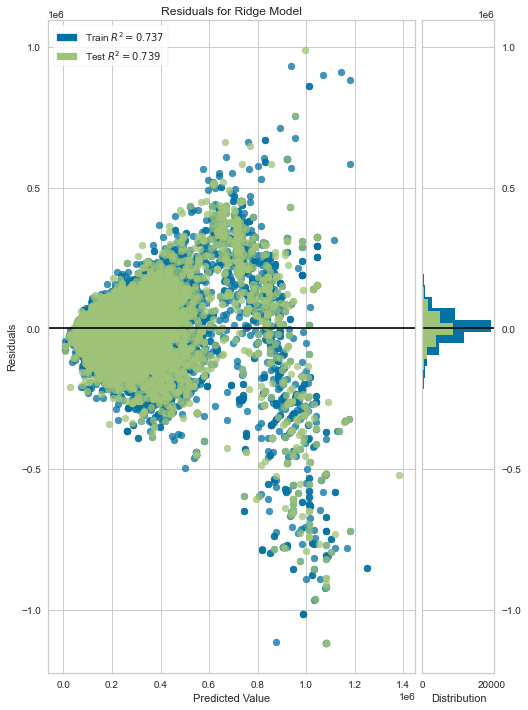

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

time: 2.05 s (started: 2021-06-15 00:09:59 -03:00)


In [119]:
from sklearn.linear_model import Ridge
#from sklearn.model_selection import train_test_split

#from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_trainfi, y_trainfi)  # Fit the training data to the visualizer
visualizer.score(X_testfi, y_testfi)  # Evaluate the model on the test data
visualizer.show()  

__Gráfica 25:__ gráfico de residuales que muestra la distribución del error a medida que los valores de X aumentan. Se puede ver una morfología de "abanico" en la distribución del error. 
___

## __Parte C Interpretación de modelos__

En esta parte B del __SPRINT 02__ se entrenaron modelos con la intención de observar el efecto de preprocesamientos como:

  * __El tratamiento de outliers.__
  * __Codificación de variables categóricas.__
  * __Tuning de hiperparámetros por medio de Grid Search.__
  * __Tuning de hiperparámetros por medio de Cross Validation.__

1. __Vecinos más cercanos KNN ingenuo__, se empleó el modelo definifido en el apartado F del SPRINT 01 como _modelo_KNNi_ y fué optimizado de la aplicación del método Grid Search. Este experimento arrojó un resultado favorable de Mejor Score R2: 0.814 versus el score R2: 0.762 para el modelo ingenuo y R2: 0.771 para el modelo optimizado solo en la cantidad de vecinos. Adicionalmente, la aplicación de Grid Search reveló que para dicho algoritmo la mejor combinación de hiperparámetros es: __{'algorithm': 'kd_tree', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'distance'}__; los cuales fueron empleados para reentrenar dicho modelo KNN desde el inicio y verificar los resultados arrojados por __Grid Search__.
    
    Posteriormente para obtener un acercamiento de la importancia de las variables independientes se realizó el experimento con __regularización Ridge__, el cual reveló una lista de 25 variables, cuya implementación en el modelo en combinación con los hiperparámetros arriba descritos, mejoró el desempeño del modelo a R2: 0.839 utilizando apenas menos del 40% de las variables independientes usadas originalmente.  

    Esto representa una mejora significativa en la estructura del modelo al mantener un desempeño equivalente usando menos del 40% de las variables independientes generadas durante la limpieza y transformación del set de datos original. 
    
    __Desventaja:__ Se debe mencionar que este modelo supone un altísimo costo computacional al tardarse poco menos de 60 minutos en su entrenamiento. 
    


2. __Árboles de decisión DT ingenuo__, definido en el apartado F del SPRINT 01 como _modelo_DTi_, en este SPRINT 02 se entrenó un modelo basado en árboles de decisión tras ser optimizado con el agoritmo de __Cross Validation__. Según los resultados de la tabla 24, este modelo fue entrenado en el apartado "q" y usando la selección de features obtenida de la regularización Ridge en el apartado "o". Este modelo ocupó muy poco tiempo de procesamiento para generar un score R2= 0.903, arrojando resultados notablemente mejores que el modelo anterior basado en algoritmo KNN. Adicionalmente tuvo un desempeño sobresaliente durante el entrenamiento, arrojando tiempos de alrededor de los 550 milisegundos durante el entrenamiento.



3. __Modelo de ensamble XGBoost__, fue entrenado utilizando parámetros definidos tras numerosos experimentos al tanteo. El modelo XGBoost entrenado dió resultados notablemente mejores que los dos modelos anteriores, esto si consideramos el poco esfuerzo realizado en la optimización no sistematizada aplicada al mismo. Este modelo mostró mejor desempeño con un R2: 0.920, y empleando tiempos de entrenamiento de alrededor de 45 segundos.

    __Variables relevantes para el modelo para hacer una predicción:__ 
    
    Tras la implementación de la regularización Ridge en el apartado "o", se logró obtener la gráfica 23 que muestra el nivel de importancia de cada una de las variables disponibles, y es desde este análisis, de donde se seleccionaron las variables que aportaran mayor explicabilidad al modelo.
    
    __Espectativas respecto a la experiencia previa con el dataset:__
    
    Durante el desarrollo del SPRINT 01 siguiendo las instrucciones de la consigna, se descartó el uso de las variables categóricas "l3" y "Property Type", las cuales por su significado en el dataset, "agrupaban" a las propiedades en ubicaciones y tipos con rangos de precios bien diferenciados para muchos de estos "grupos". Iniciando el SPRINT 02 y tras la realizacion de un EDA más consciente, se pudo determinar la importancia de estas variables como criterios de separación inicial que muy bien podrían ser aprovechados por los algoritmos basados en árboles de decisión. Basándonos en los explicado anteriormente, y como se esperaba según la experiencua previa con el dataset, se consideran dichas variables un aporte importante en el mejoramiento del desempeño predictivo de los modelos entrenados en el SPRINT 02.
    
    __Distribución de errores:__
    
    Tal como se hizo al final del SPRINT 01, utilizando la librería "YellowBrick" en el apartado "s" se realizó una gráfica de residuales (gráfico 25); en la que claramente se ve un aumento del error a medida que los valores de X aumentan. Esta dispersión irregular en forma de "abanico" indica que la varianza no es constante y por ende los residuos son cercanos a 0 para valores de x pequeños y están más extendidos para valores de x grandes, este fenómeno se conoce como heterocedasticidad. Desde el punto de vista teórico se dice que los modelos de regresión que muestran este comportamiento no cumplen con el supuesto de homocedasticidad y por lo tanto incumplen también una de las hipótesis básicas sobre las que se asienta el modelo de regresión lineal.
    
    ___

# ================     Fin del notebook correspondiente al SPRINT 02      =================
___
___